# Short term plasticity (STP)

The goal of this notebook is to reproduce the first four figures from [(Tsodyks M, Pawelzik K, Markram H, Neural networks with dynamic synapses. Neural Comput. 1998)](https://zpkilpat.github.io/appm4370/papers/tsodyks98.pdf), which first introduced this model. As seen during the tutorial, the synaptic vesicles are modeled through the following three equations
\begin{align}
    & \frac{dx(t)}{dt} = \frac{z(t)}{\tau_{rec}} - U_{SE}^1(t)x(t)\delta(t-t_{sp}), \\[.5em]
    & \frac{dy(t)}{dt} = -\frac{y(t)}{\tau_{in}} + U_{SE}^1(t)x(t)\delta(t-t_{sp}), \\[.5em]
    & \frac{dz(t)}{dt} = \frac{y(t)}{\tau_{in}} - \frac{z(t)}{\tau_{rec}} \cdot
\end{align}
The parameter $U_{SE}(t)$ evolves following the equation
$$\frac{dU_{SE}^1(t)}{dt} = -\frac{U_{SE}^1(t)}{\tau_{facil}} + U_{SE}(1-U_{SE}^1(t))\delta(t-t_{sp}), $$
where $U_{SE}^1$ is the running value of $U_{SE}.$

In [14]:
import numpy as np
import math as math
import tqdm as tqdm
import matplotlib.pyplot as plt
from decimal import Decimal as D # modulo operator for decimal numbers

np.random.seed(42)

# Figure properties
fig_width = 10
fig_height = 6
plt.rcParams['figure.figsize'] = [fig_width,fig_height]
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 16#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 16#9
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'

# Custom colors
purple = '#62275D'
red = '#C32C57'

## Simulation of a postsynaptic potential generated by a regular spike train at a frequency of 20Hz transmitted through a depressing synapse

Text(0, 0.5, 'mV')

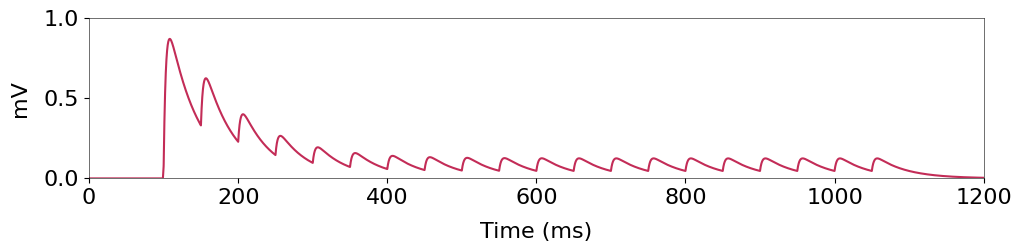

In [9]:
def fig1a(tau_in, tau_r, tau_m, tsp, R):
    time = np.linspace(0, 1200, 1200*100+1)
    dt = time[1]
    V = []
    x, y, z = [0.855], [0.145], [0.0] 
    i = 0
    for t in time :
        if t < 99 :
            V.append(0)
        if (t >= 99 and t % tsp != 0) or t>=1100 :
            V.append(V[-1] + ((-V[-1]/tau_m)+(R/tau_m)*250*y[i])*dt )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            i += 1
        if t >= 99 and t < 1100 and t % tsp == 0 :
            V.append(V[-1] + ((-V[-1]/tau_m) +(R/tau_m)*250*y[i])*dt )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            i += 1
    return np.array(V)

# Figure 1A
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 1200, 1200*100+1), fig1a(3, 800, 40, 50, 100)*0.001, color=red)
plt.ylim(0,1)
plt.xlim(0,1200)
plt.xlabel('Time (ms)')
plt.ylabel('mV')

## Simulation of a postsynaptic potential generated by a regular spike train at a frequency of 20Hz transmitted through a facilitating synapse

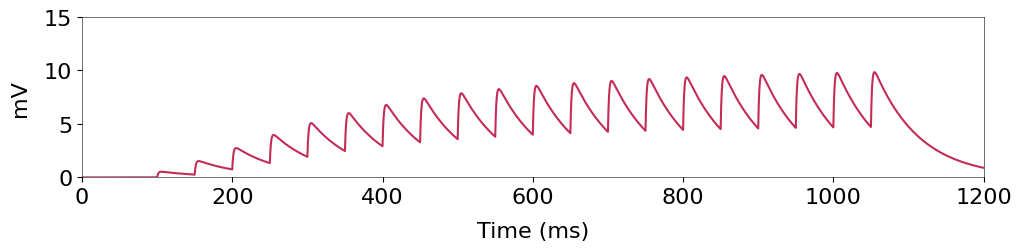

In [10]:
def fig1b(tau_in, tau_r, tau_m, tau_f, Use, tsp, R):
    time = np.linspace(0, 1200, 1200*100+1)
    dt = time[1]

    V = []
    x, y, z = [0.5], [0.], [0.5]
    i = 0

    U = [0]
    for t in time :
        if t < 99 :
            V.append(0)
        if (t >= 99 and t % tsp != 0) or t>=1100 :
            U.append( # ___ )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            V.append(V[-1] + ((-V[-1]/tau_m) + (R/tau_m)*1540*y[i])*dt )
            i += 1
        if t >= 99 and t < 1100 and t % tsp == 0 :
            U.append( # ___ )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            V.append(V[-1] + ((-V[-1]/tau_m) + (R/tau_m)*1540*y[i])*dt )
            i += 1
    return np.array(V)

# Figure 1B
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 1200, 1200*100+1), fig1b(1.5, 130, 60, 530, 0.03, 50, 1000)*0.001, color=red)
plt.xlim(0,1200)
plt.ylim(0,15)
plt.xlabel('Time (ms)')
plt.ylabel('mV')
plt.show()

## Simulation of a postsynaptic potential generated by a regular spike train at a frequency of 70Hz transmitted through a facilitating synapse

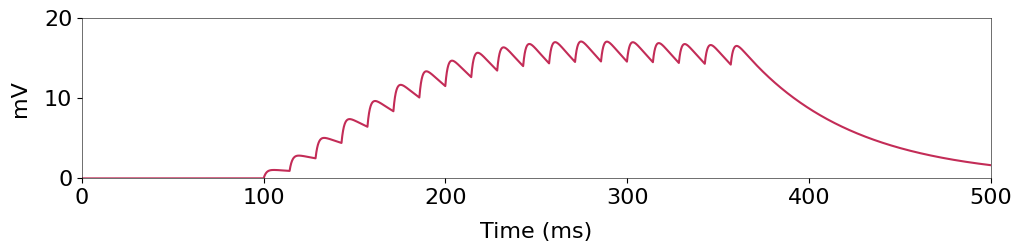

In [11]:
def fig1c(tau_in, tau_r, tau_m, tau_f, Use, tsp, R):
    time = np.linspace(0, 500, 500*100+1)
    dt = time[1]

    V = []
    x, y, z = [1], [0.], [0.]
    i = 0

    U = [0]
    for t in time :
        if t < 99 :
            V.append(0)
        if (t >= 99 and D(f'{round(t,4)}') % D(f'{tsp}') != 0) or t>=360 :
            U.append( # ___ )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            V.append(V[-1] + ((-V[-1]/tau_m)+(R/tau_m)*1540*y[i])*dt )
            i += 1

        if t >= 99 and t < 360 and D(f'{round(t,4)}') % D(f'{tsp}') == 0 :
            U.append( # ___ )
            x.append( # ___ )
            y.append( # ___ )
            z.append( # ___ )
            V.append(V[-1] + ((-V[-1]/tau_m) +(R/tau_m)*1540*y[i])*dt )
            i += 1
    return np.array(V)


# Figure 1C
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 500, 500*100+1), fig1c(1.5, 130, 60, 530, 0.03, 14.28, 1000)*0.001, color=red)
plt.xlim(0,500)
plt.ylim(0,20)
plt.xlabel('Time (ms)')
plt.ylabel('mV')
plt.show()

## Stationary level of postsynaptic potentials plotted against different presynaptic frequencies for facilitating synapses

100%|█████████████████████████████████████████| 109/109 [00:33<00:00,  3.29it/s]


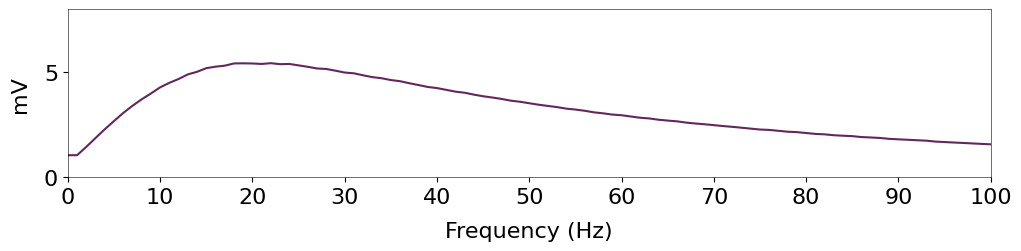

In [16]:
def fig1d(tau_in, tau_r, tau_m, tau_f, Use, R, r):
    time = np.linspace(0, 1000, 1000*10+1)
    dt = time[1] 
    
    V = np.array([0])
    x, y, z = np.array([1]), np.array([0.]), np.array([0.])
    i = 0
    
    U = np.array([0])
    tsp = round(1000/r, 1)
    for t in time :
        if D(f'{round(t,4)}') % D(f'{tsp}') != 0 :
            U = np.append(U, # ___ )
            x = np.append(x, # ___ )
            y = np.append(y, # ___ )
            z = np.append(z, # ___ )
            V = np.append(V, V[-1] + ((-V[-1]/tau_m)+(R/tau_m)*1540*y[i])*dt )
            i += 1

        if D(f'{round(t,4)}') % D(f'{tsp}') == 0 :
            U = np.append(U, # ___ )
            x = np.append(x, # ___ )
            y = np.append(y, # ___ )
            z = np.append(z, # ___ )
            V = np.append(V, V[-1] + ((-V[-1]/tau_m) +(R/tau_m)*1540*y[i])*dt )
            i += 1

    if tsp > 400 :
        # print('increment is ', (max(V) - min(V))*0.001)
        return (max(V) - min(V))*0.001
    else :
        # print('increment is ', (max(V[int(2*len(V)/3):]) - min(V[int(2*len(V)/3):]))*0.001)
        return (max(V[int(2*len(V)/3):]) - min(V[int(2*len(V)/3):]))*0.001

# Figure 1D
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] + [k + 1 for k in range(0,100)])
y = np.array([])
for k in tqdm.tqdm(x) :
    # print(round(k,1))
    y  = np.append(y, fig1d(1.5, 130, 60, 530, 0.03, 1000, k))

# Figure 1D
plt.figure(figsize=(10.5,2.8))
plt.plot(x, y, color=purple)
plt.xlim(0,100)
plt.ylim(0,8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('mV')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks([0, 5])
plt.show()